<a href="https://colab.research.google.com/github/jagrutimohanty/CMPE-258-DeepLearning/blob/main/Assignment5/CMPE_258_Taxi_assignment5_Xgboost_part_d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Jagruti Mohanty

Assignment : Assignment 5 part d
### Using XBoost build the taxi fare prediciton model

-Created new feature (minutes) as a part of feature engineering step

-Changed the parameters for xgboost model which resulted in lowering the rmse loss value and better accuracy


Completed the assignment with help of reference shared and made modifications and additions to the existing code

### About the problem and dataset

Use NYC's openly available taxi-fare dataset to predict the price of a Taxi ride. Our goal is to use TF as the ML Framework to build a pipeline which should be capable of scaling on infinite data to make an enterprise scale model.


In [ ]:
# load some default Python modules
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

plt.style.use('seaborn-whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
#Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

!ls '/content/gdrive/MyDrive/CMPE-258-Jagruti Mohanty/train.csv'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
'/content/gdrive/MyDrive/CMPE-258-Jagruti Mohanty/train.csv'


In [ ]:
train = pd.read_csv('/content/gdrive/MyDrive/CMPE-258-Jagruti Mohanty/train.csv', sep=',',nrows=200000)
#
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
# datatypes
train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [ ]:
# Basic Stats of the data set
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.342877,-72.506121,39.922326,-72.518673,39.925579,1.682445
std,9.837855,11.608097,10.048947,10.724226,6.751120,1.306730
min,-44.900000,-736.550000,-3116.285383,-1251.195890,-1189.615440,0.000000
25%,6.000000,-73.992050,40.735007,-73.991295,40.734092,1.000000
50%,8.500000,-73.981743,40.752761,-73.980072,40.753225,1.000000
75%,12.500000,-73.967068,40.767127,-73.963508,40.768070,2.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000


In [ ]:
print("old size: %d" % len(train))
train = train[train.fare_amount >=0]
print("New size: %d" % len(train))

old size: 200000
New size: 199987


In [ ]:
# check missing data
train.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [ ]:
print("old size: %d" % len(train))
train = train.dropna(how='any', axis=0)
print("New size after dropping missing value: %d" % len(train))

old size: 199987
New size after dropping missing value: 199986


Text(0, 0.5, 'Frequency')

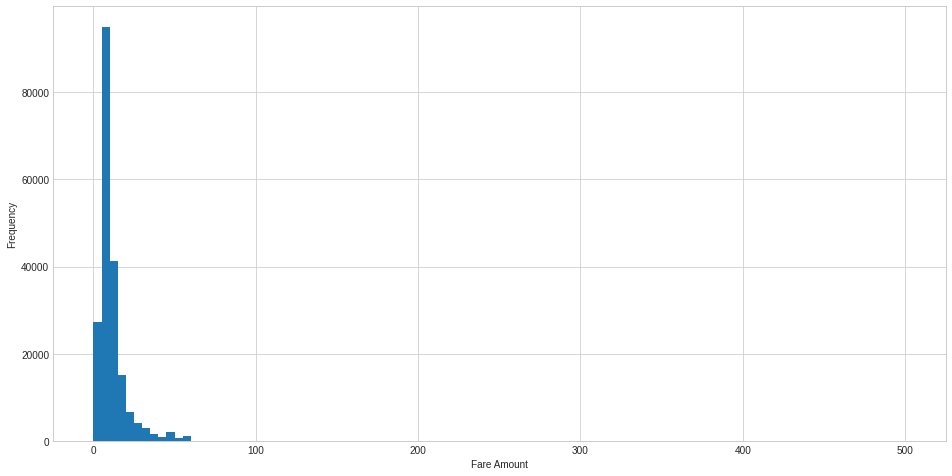

In [ ]:
# Lets see the distribution of fare amount 
train.fare_amount.hist(bins=100, figsize = (16,8))
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

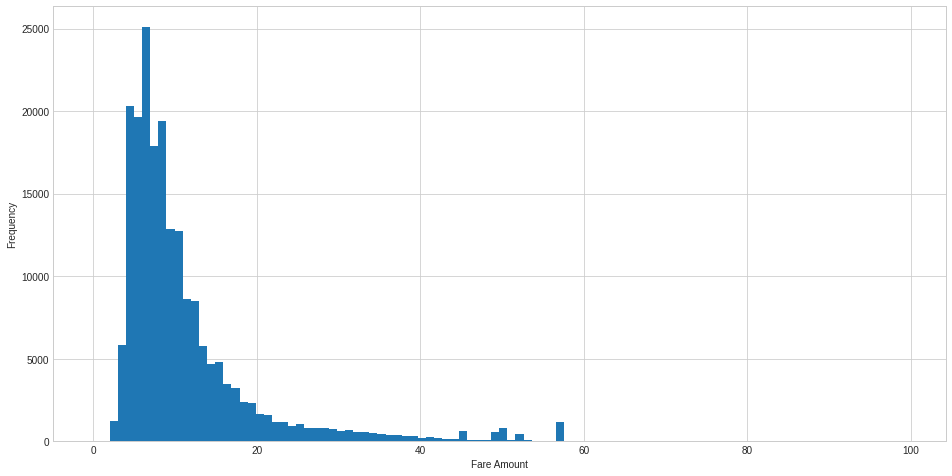

In [ ]:
# Lets see the distribution of fare amount less than 100
train[train.fare_amount <100 ].fare_amount.hist(bins=100, figsize = (16,8))
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")

In [ ]:
train[train.fare_amount >100 ].shape

(85, 8)

Text(0, 0.5, 'Frequency')

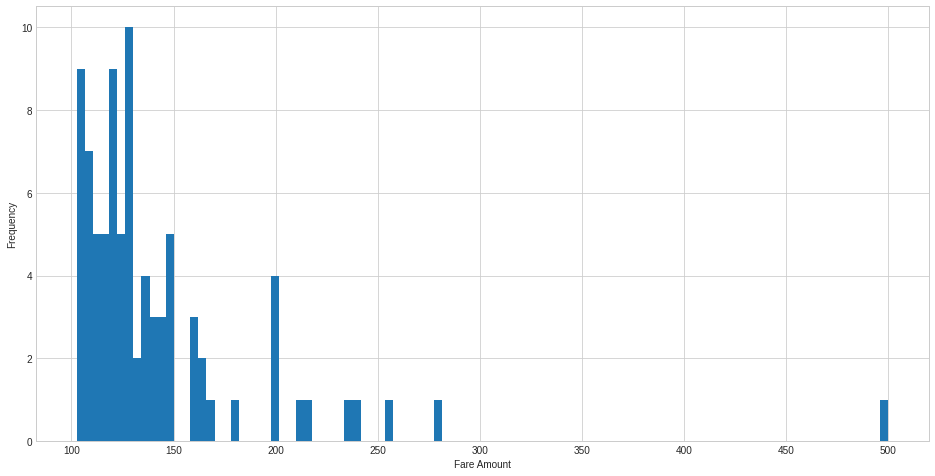

In [ ]:
# Lets see the distribution of fare amount more than 100
train[train.fare_amount >100 ].fare_amount.hist(bins=100, figsize = (16,8))
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

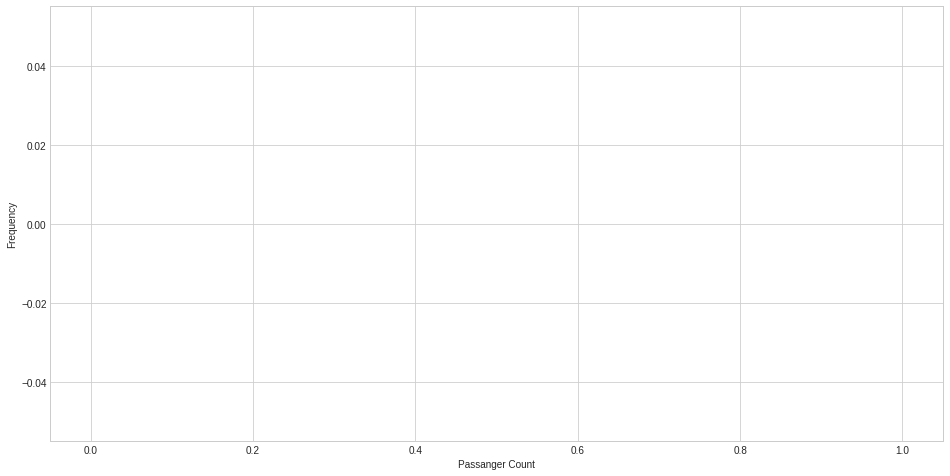

In [ ]:
# checking for passanger count greater than 7
train[train.passenger_count >7].passenger_count.hist(bins=10, figsize = (16,8))
plt.xlabel("Passanger Count")
plt.ylabel("Frequency")

In [ ]:
# data for passanger count greater than 7
train[train.passenger_count >7]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


Text(0, 0.5, 'Frequency')

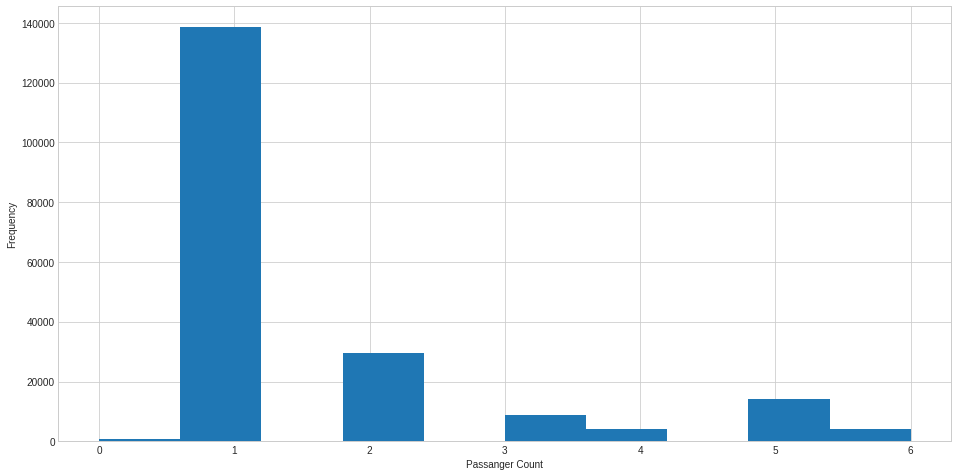

In [ ]:
# checking for passanger count less than 7
train[train.passenger_count <7].passenger_count.hist(bins=10, figsize = (16,8))
plt.xlabel("Passanger Count")
plt.ylabel("Frequency")

In [ ]:
# checking for records where passanger count is 0
train[train.passenger_count ==0].shape

(713, 8)

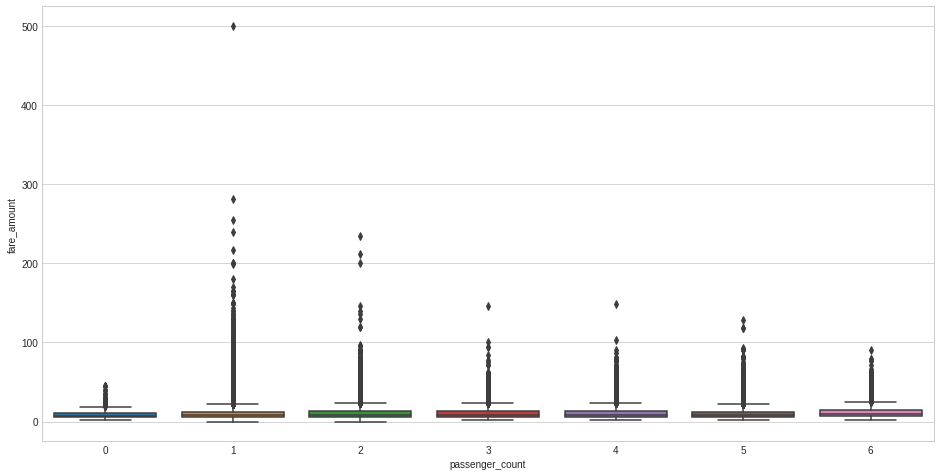

In [ ]:
plt.figure(figsize= (16,8))
sns.boxplot(x = train[train.passenger_count< 7].passenger_count, y = train.fare_amount)

In [ ]:
train[train.passenger_count <7][['fare_amount','passenger_count']].corr()

,fare_amount,passenger_count
fare_amount,1.000000,0.013906
passenger_count,0.013906,1.000000


In [ ]:
#Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#Get the Shareable file link and get the contents
downloaded = drive.CreateFile({'id':"1uBPgT7IhDcuKddxuls6MKJwIL_A0zg-Q"})   
downloaded.GetContentFile('test.csv') 

In [ ]:
test = pd.read_csv('test.csv', sep=',')
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [ ]:
#check for missing value
test.isnull().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [ ]:
# checking for basic stats
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [ ]:
min(test.pickup_longitude.min(),test.dropoff_longitude.min()), \
max(test.pickup_longitude.max(),test.dropoff_longitude.max())

(-74.263242, -72.986532)

In [ ]:
min(test.pickup_latitude.min(),test.dropoff_latitude.min()), \
max(test.pickup_latitude.max(),test.dropoff_latitude.max())

(40.568973, 41.709555)

In [ ]:
# this function will also be used with the test set below
def select_within_test_boundary(df, BB):
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
           (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
           (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
           (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])

In [ ]:
BB = (-74.5, -72.8, 40.5, 41.8)
print('Old size: %d' % len(train))
train = train[select_within_test_boundary(train, BB)]
print('New size: %d' % len(train))

Old size: 199986
New size: 195801


# New-added feature minutes

In [ ]:
def prepare_time_features(df):
    df['pickup_datetime'] = df['pickup_datetime'].str.slice(0, 16)
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], utc=True, format='%Y-%m-%d %H:%M')
    df['hour_of_day'] = df.pickup_datetime.dt.hour
#jagruti
    df['minutes'] = df.pickup_datetime.dt.strftime("%M")
    df['minutes'] = df['minutes'].astype(int)
#jagruti   
#     df['week'] = df.pickup_datetime.dt.week
    df['month'] = df.pickup_datetime.dt.month
    df["year"] = df.pickup_datetime.dt.year

#     df['day_of_year'] = df.pickup_datetime.dt.dayofyear
#     df['week_of_year'] = df.pickup_datetime.dt.weekofyear
    df["weekday"] = df.pickup_datetime.dt.weekday
#     df["quarter"] = df.pickup_datetime.dt.quarter
#     df["day_of_month"] = df.pickup_datetime.dt.day
    
    return df

In [ ]:
train = prepare_time_features(train)
test = prepare_time_features(test)

In [ ]:
# calculate-distance-between-two-latitude-longitude-points-haversine-formula 
# Returns distance in miles
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))   # 2*R*asin...

In [ ]:
train['distance_miles'] = distance(train.pickup_latitude, train.pickup_longitude, \
                                      train.dropoff_latitude, train.dropoff_longitude)

In [ ]:
test['distance_miles'] = distance(test.pickup_latitude, test.pickup_longitude, \
                                      test.dropoff_latitude, test.dropoff_longitude)

In [ ]:
def transform(data):
    # Distances to nearby airports, 
    jfk = (-73.7781, 40.6413)
    ewr = (-74.1745, 40.6895)
    lgr = (-73.8740, 40.7769)

    data['pickup_distance_to_jfk'] = distance(jfk[1], jfk[0],
                                         data['pickup_latitude'], data['pickup_longitude'])
    data['dropoff_distance_to_jfk'] = distance(jfk[1], jfk[0],
                                           data['dropoff_latitude'], data['dropoff_longitude'])
    data['pickup_distance_to_ewr'] = distance(ewr[1], ewr[0], 
                                          data['pickup_latitude'], data['pickup_longitude'])
    data['dropoff_distance_to_ewr'] = distance(ewr[1], ewr[0],
                                           data['dropoff_latitude'], data['dropoff_longitude'])
    data['pickup_distance_to_lgr'] = distance(lgr[1], lgr[0],
                                          data['pickup_latitude'], data['pickup_longitude'])
    data['dropoff_distance_to_lgr'] = distance(lgr[1], lgr[0],
                                           data['dropoff_latitude'], data['dropoff_longitude'])
    
    return data

train = transform(train)
test = transform(test)

In [ ]:
train[(train['distance_miles']==0)&(train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour_of_day,minutes,month,year,weekday,distance_miles,pickup_distance_to_jfk,dropoff_distance_to_jfk,pickup_distance_to_ewr,dropoff_distance_to_ewr,pickup_distance_to_lgr,dropoff_distance_to_lgr


In [ ]:
print("old size: %d" % len(train))
train = train.drop(index= train[(train['distance_miles']==0)&(train['fare_amount']==0)].index, axis=0)
print("New size: %d" % len(train))

old size: 195801
New size: 195801


In [ ]:
train[train['fare_amount']==0].shape

(4, 20)

In [ ]:
print("old size: %d" % len(train))
train = train.drop(index= train[train['fare_amount']==0].index, axis=0)
print("New size: %d" % len(train))

old size: 195801
New size: 195797


In [ ]:
train[train['fare_amount'] < 2.5].shape

(3, 20)

In [ ]:
print("old size: %d" % len(train))
train = train.drop(index= train[train['fare_amount'] < 2.5].index, axis=0)
print("New size: %d" % len(train))

old size: 195797
New size: 195794


In [ ]:
train[train.passenger_count >= 7]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour_of_day,minutes,month,year,weekday,distance_miles,pickup_distance_to_jfk,dropoff_distance_to_jfk,pickup_distance_to_ewr,dropoff_distance_to_ewr,pickup_distance_to_lgr,dropoff_distance_to_lgr


In [ ]:
print("old size: %d" % len(train))
train = train.drop(index= train[train.passenger_count >= 7].index, axis=0)
print("New size: %d" % len(train))

old size: 195794
New size: 195794


In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
fare_amount,195794.0,11.327586,9.747742,2.500000,6.000000,8.500000,12.500000,500.000000
pickup_longitude,195794.0,-73.975089,0.038877,-74.438233,-73.992260,-73.982045,-73.968307,-72.856968
pickup_latitude,195794.0,40.751188,0.029950,40.500046,40.736652,40.753532,40.767549,41.692428
dropoff_longitude,195794.0,-73.974021,0.038285,-74.474595,-73.991473,-73.980503,-73.965180,-72.854940
dropoff_latitude,195794.0,40.751527,0.033111,40.500046,40.735666,40.753954,40.768380,41.714633
passenger_count,195794.0,1.682590,1.306671,0.000000,1.000000,1.000000,2.000000,6.000000
hour_of_day,195794.0,13.518591,6.502125,0.000000,9.000000,14.000000,19.000000,23.000000
minutes,195794.0,29.560308,17.305877,0.000000,15.000000,30.000000,45.000000,59.000000
month,195794.0,6.273522,3.445627,1.000000,3.000000,6.000000,9.000000,12.000000
year,195794.0,2011.738378,1.864582,2009.000000,2010.000000,2012.000000,2013.000000,2015.000000


In [ ]:
#train data set
pd.cut(train['distance_miles'],np.linspace(0, 70, num = 8)).value_counts()

(0.0, 10.0]     189569
(10.0, 20.0]      4043
(20.0, 30.0]        32
(60.0, 70.0]        23
(50.0, 60.0]        16
(40.0, 50.0]         1
(30.0, 40.0]         1
Name: distance_miles, dtype: int64

In [ ]:
# test data set
pd.cut(test['distance_miles'],np.linspace(0, 70, num = 8)).value_counts()

(0.0, 10.0]     9611
(10.0, 20.0]     214
(60.0, 70.0]       3
(20.0, 30.0]       1
(50.0, 60.0]       0
(40.0, 50.0]       0
(30.0, 40.0]       0
Name: distance_miles, dtype: int64

In [ ]:
# we will deal with it later 
fare_100 = train[train.fare_amount > 100]
fare_100.shape

(75, 20)

In [ ]:
fare_100[fare_100.distance_miles <1].shape

(32, 20)

In [ ]:
train.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'hour_of_day', 'minutes', 'month', 'year', 'weekday',
       'distance_miles', 'pickup_distance_to_jfk', 'dropoff_distance_to_jfk',
       'pickup_distance_to_ewr', 'dropoff_distance_to_ewr',
       'pickup_distance_to_lgr', 'dropoff_distance_to_lgr'],
      dtype='object')

In [ ]:
# create copy of the data set
df_train = train.drop(columns= ['key','pickup_datetime'], axis= 1).copy()
df_test = test.drop(columns= ['key','pickup_datetime'], axis= 1).copy()
print(df_train.shape)
print(df_test.shape)

(195794, 18)
(9914, 17)


In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('fare_amount', axis=1),
                                                    df_train['fare_amount'], test_size=0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(156635, 17)
(39159, 17)
(156635,)
(39159,)


In [ ]:
import xgboost as xgb

In [ ]:
#params = {
#   
#    'max_depth': 7,
#    'gamma' :0,
#    'eta':.03, 
#    'subsample': 1,
#    'colsample_bytree': 0.9, 
#    'objective':'reg:linear',
#    'eval_metric':'rmse',
#    'silent': 0
#}

# Modified the parameters for the XGBoost model

In [ ]:
#Jagruti Changed Parameters  

params = {
   
    'max_depth': 9,
    'gamma' :0,
    'eta':.02, 
    'subsample': 1,
    'colsample_bytree': 0.8, 
    'objective':'reg:linear',
    'eval_metric':'rmse',
    'silent': 0
}

#

In [ ]:
def XGBmodel(X_train,X_test,y_train,y_test,params):
    matrix_train = xgb.DMatrix(X_train,label=y_train)
    matrix_test = xgb.DMatrix(X_test,label=y_test)
    model=xgb.train(params=params,
                    dtrain=matrix_train,num_boost_round=7000, 
                    early_stopping_rounds=10,evals=[(matrix_test,'test')])
    return model

model = XGBmodel(X_train,X_test,y_train,y_test,params)

[00:22:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	test-rmse:14.3472
Will train until test-rmse hasn't improved in 10 rounds.
[1]	test-rmse:14.0879
[2]	test-rmse:13.8337
[3]	test-rmse:13.598
[4]	test-rmse:13.3547
[5]	test-rmse:13.1171
[6]	test-rmse:12.8968
[7]	test-rmse:12.6817
[8]	test-rmse:12.4584
[9]	test-rmse:12.2527
[10]	test-rmse:12.0384
[11]	test-rmse:11.8292
[12]	test-rmse:11.6365
[13]	test-rmse:11.437
[14]	test-rmse:11.2527
[15]	test-rmse:11.062
[16]	test-rmse:10.8746
[17]	test-rmse:10.6927
[18]	test-rmse:10.5156
[19]	test-rmse:10.3513
[20]	test-rmse:10.1916
[21]	test-rmse:10.0242
[22]	test-rmse:9.86051
[23]	test-rmse:9.71224
[24]	test-rmse:9.55672
[25]	test-rmse:9.41447
[26]	test-rmse:9.26539
[27]	test-rmse:9.12034
[28]	test-rmse:8.97809
[29]	test-rmse:8.84071
[30]	test-rmse:8.71337
[31]	test-rmse:8.58989
[32]	test-rmse:8.46128
[33]	test-rmse:8.33547
[34]	test-rmse:8.22112
[35]	test-rmse:8.10103
[

In [ ]:
prediction = model.predict(xgb.DMatrix(df_test), ntree_limit = model.best_ntree_limit).tolist()

In [ ]:
test

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour_of_day,minutes,month,year,weekday,distance_miles,pickup_distance_to_jfk,dropoff_distance_to_jfk,pickup_distance_to_ewr,dropoff_distance_to_ewr,pickup_distance_to_lgr,dropoff_distance_to_lgr
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:00+00:00,-73.973320,40.763805,-73.981430,40.743835,1,13,8,1,2015,1,1.443607,13.274326,12.792807,11.718491,10.785343,5.275249,6.068721
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:00+00:00,-73.986862,40.719383,-73.998886,40.739201,1,13,8,1,2015,1,1.507044,12.196699,13.399582,10.042731,9.817205,7.119935,7.035995
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:00+00:00,-73.982524,40.751260,-73.979654,40.746139,1,11,53,10,2011,5,0.384398,13.130080,12.804646,10.921174,10.928398,5.949126,5.923673
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:00+00:00,-73.981160,40.767807,-73.990448,40.751635,1,21,12,12,2012,5,1.218529,13.766807,13.485374,11.478334,10.550950,5.642243,6.338990
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:00+00:00,-73.966046,40.789775,-73.988565,40.744427,1,21,12,12,2012,5,3.347514,14.216819,13.127774,12.926314,10.450604,4.896995,6.401733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:00+00:00,-73.968124,40.796997,-73.955643,40.780388,6,12,37,5,2015,6,1.320336,14.654308,13.372190,13.110204,13.066168,5.116029,4.278349
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:00+00:00,-73.945511,40.803600,-73.960213,40.776371,6,17,5,1,2015,0,2.032486,14.233755,13.344366,14.346682,12.723911,4.170965,4.510944
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:00+00:00,-73.991600,40.726608,-73.789742,40.647011,6,20,44,4,2015,6,11.920349,12.644137,0.726759,9.916691,20.376600,7.068421,10.000717
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:00+00:00,-73.985573,40.735432,-73.939178,40.801731,6,1,5,1,2015,5,5.184402,12.666946,13.929041,10.391022,14.555692,6.504521,3.816918


In [ ]:

holdout = pd.DataFrame({'key': test['key'], 'fare_amount': prediction})
holdout.to_csv('xgb_4m_utc_with_cleaning.csv', index=False)

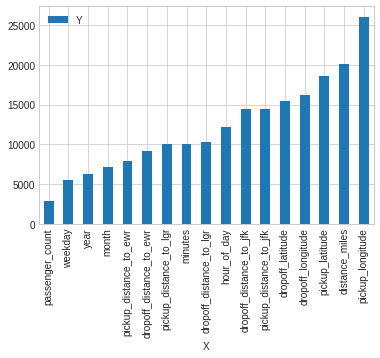

In [ ]:
import matplotlib.pyplot as plt
fscores = pd.DataFrame({'X': list(model.get_fscore().keys()), 'Y': list(model.get_fscore().values())})
fscores.sort_values(by='Y').plot.bar(x='X')